<a href="https://colab.research.google.com/github/lava13ratna/MatrixWithPython/blob/main/MatrixWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp 
import scipy.stats as st
from scipy import signal
import matplotlib.pyplot as plt

In [10]:
#A.T -> transpose of A
#dot -> dot product of two matrix
A = np.array([[1, 2],[3, 4]])   
b=np.array([5,6])
c=np.array([0,1])
print(np.dot(A.T+c,b))

[29 40]


In [25]:
#np.arange(x) will give 1*x matrix,and start with 0
A=np.arange(9).reshape(3,-1)
#reshape(x,y) change shape of an matrix with x row and y column, if -1-> needed columns
#np.eye create identity matrix with given range
B=np.eye(3)
#trace give sum of diagonal elements
print(np.trace(A-2*B))


6.0


In [26]:
I = np.array([
[1, 1, 1, 1, 0, 0, 0, 0],
[1, 1, 1, 1, 0, 0, 0, 0],
[1, 1, 1, 1, 0, 0, 0, 0],
[1, 1, 1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 1, 1],
[0, 0, 0, 0, 1, 1, 1, 1],
[0, 0, 0, 0, 1, 1, 1, 1],
])
S_x=np.outer(np.array([1,2,1]).T,np.array([-1,0,1]))
print(S_x)
print(signal.convolve2d(I, S_x, boundary='symm'))

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 0  0  0  0  4  4  0  0  0  0]
 [ 0  0  0  0  4  4  0  0  0  0]
 [ 0  0  0  0  4  4  0  0  0  0]
 [ 0  0  0  0  4  4  0  0  0  0]
 [ 0  0  0  0  2  2  0  0  0  0]
 [ 0  0  0  0 -2 -2  0  0  0  0]
 [ 0  0  0  0 -4 -4  0  0  0  0]
 [ 0  0  0  0 -4 -4  0  0  0  0]
 [ 0  0  0  0 -4 -4  0  0  0  0]]


In [31]:
#np.power and limit
from sympy import Symbol, Limit, sin 
x =Symbol('x')
ans = Limit(np.power((1 + (1 / x)), x), x, np.inf).doit() 
print(round(ans, 2))

2.72


In [32]:
def is_prime(num):                                       #** power, // quotient, %remainder
  for n in range(2, int(num ** 1/2) + 1):                #**1/2 squareroot        because num^1/2
    if num% n == 0:
      return False
  return True

def sum_digits(num):
  return (num % 10) + (num // 10)                        #//10 means gives quotient of division    Eg:10/3    quotient:3
  
a, b = [2**i for i in range(4, 6)]                       #2**i means 2^i     range(4,6)takes value 4 & 5       so a=16     b=32
c, d =[10*i for i in range(2, 4)]                        #10*i  means direct multiplication   range(2,4) takes values 2 &3    so c=20    d=30 
a1 = np.arange(a,b)                                      #a1= 16 17 18 .......31
a2= np.arange(c, d)                                      #a2= 20 21 22 23  .................29
s1 = set(filter(is_prime, a1))                           #s1 is prime numbers in a1         s1=17,19,23,29,31
s2 = set([i for i in a2 if sum_digits(i) < 2**3])        #E.g 20 =>  20%10=0   +    20//10=2   =>2    2<2^3   so print 20
print(len(s1.union(s2)))

10


Text(0.5, 1.0, 'CDF from integration over gaussian-mixture PDF')

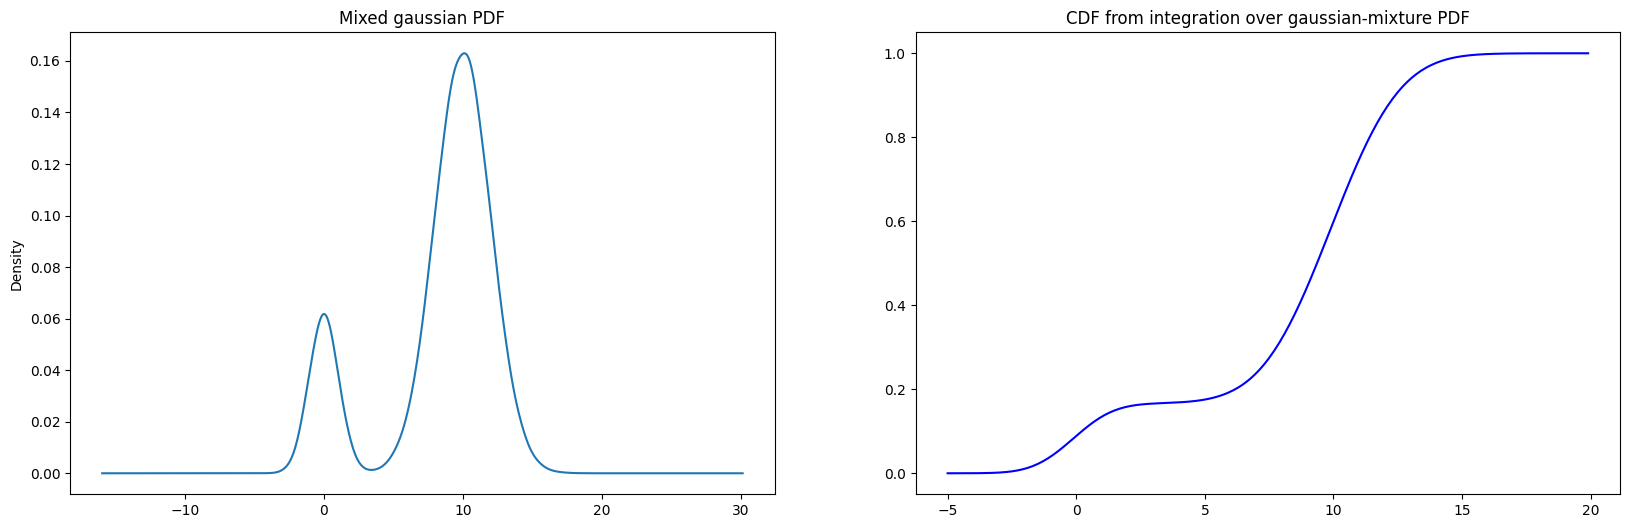

In [33]:
import pandas as pd
from sklearn.neighbors import KernelDensity 
from scipy.integrate import quad
def pdf2cdf(X): 
  '''
  Calculates cumulative distribution function (CDF) using integration
  '''
  kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, np.newaxis])
  gmm_pdf = lambda x: np.exp(kde.score(np.array([x]).reshape(-1, 1)))
  x_cdf = np.arange(-5, 20, 0.1) 
  y_cdf = np.array([tup[0]
                    for tup in [quad(gmm_pdf, a, b) 
                      for a, b in [(a, b)
                       for a, b in zip(x_cdf, x_cdf[1:len(x_cdf)])]]] + [0]).cumsum()
  return x_cdf,y_cdf
N = 10000
X = np.concatenate(( np.random.normal(10, 2, 10*N),np.random.normal(0,	1, 2 *N)))
s = pd.Series(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
s.plot(kind='kde', bw_method='scott', ax=ax1) 
ax1.set_title('Mixed gaussian PDF')
x,y_cdf=pdf2cdf(X)
ax2.plot(x, y_cdf, color='b')
ax2.set_title('CDF from integration over gaussian-mixture PDF')
